In [136]:
import pandas as pd
import numpy as np
temp=pd.read_csv('../Data/global_temperatures.csv')
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [137]:
co2=pd.read_csv("../Data/co_emissions.csv")
co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [138]:
rain=pd.read_csv('../Data/precipitation.csv')
rain.head()

,Entity,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


In [139]:
forest=pd.read_csv('../Data/Forest_area.csv')
forest.head()

,Entity,Code,Year,Annual net change in forest area
0,Algeria,DZA,1990,-8800.0
1,Algeria,DZA,2000,33900.0
2,Algeria,DZA,2010,7600.0
3,Algeria,DZA,2015,-1400.0
4,Argentina,ARG,1990,-182600.0


In [140]:
disasters=pd.read_csv('../Data/new_df5.csv')
disasters.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,1949.0,United States of America (the),NaN,Natural,Geophysical,Earthquake,Ground movement,1.0,2847.0,8.0,25000000.0,306809399.0,8.148381
1,1950.0,Antigua and Barbuda,ATG,Natural,Meteorological,Storm,Tropical cyclone,1.0,5478.5,2.0,1000000.0,12136582.0,8.239552
2,1950.0,Canada,CAN,Natural,Meteorological,Storm,Convective storm,1.0,2006.0,5.5,120000000.0,250280890.0,8.239552
3,1950.0,Ecuador,ECU,Natural,Hydrological,Flood,Flood,1.0,15959.5,50.0,13000000.0,37152696.0,8.239552
4,1950.0,Indonesia,IDN,Natural,Geophysical,Earthquake,Ground movement,1.0,50.0,16.0,20150000.0,39341639.0,8.239552


In [141]:
disasters.isnull().sum()

Year                              0
Country                           0
ISO                             771
Disaster Group                    0
Disaster Subroup                  0
Disaster Type                     0
Disaster Subtype                  0
Total Events                      0
Total Affected                    0
Total Deaths                      0
Total Damage (USD, original)      0
Total Damage (USD, adjusted)      0
CPI                               0
dtype: int64

In [142]:
print(co2.columns.tolist())

['Entity', 'Year', 'Annual CO₂ emissions (per capita)']


In [143]:
co2 = co2[["Entity", "Year", "Annual CO₂ emissions (per capita)"]].rename(columns={"Entity": "Country"})

In [144]:
co2.head()

,Country,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [145]:
rain = rain[["Entity", "Code", "Year", "Annual precipitation"]].rename(columns={"Entity": "Country"})

In [146]:
rain.head()

,Country,Code,Year,Annual precipitation
0,Afghanistan,AFG,1940,217.67816
1,Afghanistan,AFG,1941,196.80933
2,Afghanistan,AFG,1942,300.08905
3,Afghanistan,AFG,1943,345.60892
4,Afghanistan,AFG,1944,324.44350


In [147]:
temp["Year"] = pd.to_datetime(temp["dt"]).dt.year

# Add a new column with the country-year average temp for each row
temp["AvgTemp_Year"] = (
    temp.groupby(["Country", "Year"])["AverageTemperature"]
    .transform("mean")
)

In [148]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,AvgTemp_Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,25.582583


In [149]:
merged_df = co2.merge(rain, on=["Country", "Year"], how="outer")

In [150]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Code,Annual precipitation
0,Afghanistan,1949,0.001992,AFG,405.3034
1,Afghanistan,1950,0.010837,AFG,347.0461
2,Afghanistan,1951,0.011625,AFG,457.9805
3,Afghanistan,1952,0.011468,AFG,382.8329
4,Afghanistan,1953,0.013123,AFG,569.5969


In [151]:
merged_df = merged_df.merge(temp, on=["Country", "Year"], how="outer")

In [152]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Code,Annual precipitation,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,AvgTemp_Year
0,Afghanistan,1949,0.001992,AFG,405.3034,1949-01-01,1.204,0.682,Kabul,34.56N,70.05E,14.17075
1,Afghanistan,1949,0.001992,AFG,405.3034,1949-02-01,3.183,0.669,Kabul,34.56N,70.05E,14.17075
2,Afghanistan,1949,0.001992,AFG,405.3034,1949-03-01,8.239,0.268,Kabul,34.56N,70.05E,14.17075
3,Afghanistan,1949,0.001992,AFG,405.3034,1949-04-01,16.010,0.731,Kabul,34.56N,70.05E,14.17075
4,Afghanistan,1949,0.001992,AFG,405.3034,1949-05-01,22.114,0.461,Kabul,34.56N,70.05E,14.17075


In [153]:
merged_df = merged_df.merge(disasters, on=["Country", "Year"], how="outer")
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Code,Annual precipitation,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,...,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-01-01,1.204,0.682,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-02-01,3.183,0.669,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-03-01,8.239,0.268,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-04-01,16.010,0.731,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1949.0,0.001992,AFG,405.3034,1949-05-01,22.114,0.461,Kabul,34.56N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
merged_df.columns

Index(['Country', 'Year', 'Annual CO₂ emissions (per capita)', 'Code',
       'Annual precipitation', 'dt', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'City', 'Latitude', 'Longitude',
       'AvgTemp_Year', 'ISO', 'Disaster Group', 'Disaster Subroup',
       'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected',
       'Total Deaths', 'Total Damage (USD, original)',
       'Total Damage (USD, adjusted)', 'CPI'],
      dtype='object')

In [155]:
merged_df=merged_df.drop(["Code",'AverageTemperatureUncertainty','City','ISO','Disaster Group','Disaster Subroup','Disaster Subtype',
                          'Total Damage (USD, original)','dt','AverageTemperature'],axis=1)

In [156]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
0,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1949.0,0.001992,405.3034,34.56N,70.05E,14.17075,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
merged_df.isnull().sum()

Country                                   0
Year                                      0
Annual CO₂ emissions (per capita)     94444
Annual precipitation                 165507
Latitude                              24347
Longitude                             24347
AvgTemp_Year                          31067
Disaster Type                        244505
Total Events                         244505
Total Affected                       244505
Total Deaths                         244505
Total Damage (USD, adjusted)         244505
CPI                                  244505
dtype: int64

In [158]:
merged_df=merged_df.dropna(subset=["Disaster Type"])

In [159]:
merged_df.isnull().sum()

Country                                 0
Year                                    0
Annual CO₂ emissions (per capita)    1018
Annual precipitation                 1102
Latitude                             3731
Longitude                            3731
AvgTemp_Year                         3731
Disaster Type                           0
Total Events                            0
Total Affected                          0
Total Deaths                            0
Total Damage (USD, adjusted)            0
CPI                                     0
dtype: int64

In [160]:
merged_df["Annual CO₂ emissions (per capita)"] = (
    merged_df.groupby("Year")["Annual CO₂ emissions (per capita)"]
    .transform(lambda x: x.fillna(x.mean()))
)

In [161]:
merged_df["Annual precipitation"] = (
    merged_df.groupby("Year")["Annual precipitation"]
    .transform(lambda x: x.fillna(x.mean()))
)


In [162]:
merged_df["AvgTemp_Year"] = (
    merged_df.groupby("Year")["AvgTemp_Year"]
    .transform(lambda x: x.fillna(x.mean()))
)


In [163]:
merged_df.isnull().sum()

Country                                 0
Year                                    0
Annual CO₂ emissions (per capita)       1
Annual precipitation                    1
Latitude                             3731
Longitude                            3731
AvgTemp_Year                         1037
Disaster Type                           0
Total Events                            0
Total Affected                          0
Total Deaths                            0
Total Damage (USD, adjusted)            0
CPI                                     0
dtype: int64

In [164]:
merged_df[merged_df["AvgTemp_Year"].isnull()]


,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
894,Afghanistan,2014.0,0.277076,348.421200,NaN,NaN,NaN,Storm,1.0,7500.0,63.0,8342696.0,80.892624
895,Afghanistan,2015.0,0.285831,396.690460,NaN,NaN,NaN,Flood,1.0,3010.0,7.0,8342696.0,80.988579
896,Afghanistan,2015.0,0.285831,396.690460,NaN,NaN,NaN,Landslide,1.0,500.0,52.0,8342696.0,80.988579
898,Afghanistan,2017.0,0.271161,324.953640,NaN,NaN,NaN,Flood,1.0,1822.0,36.0,8342696.0,83.757255
899,Afghanistan,2018.0,0.288541,280.105260,NaN,NaN,NaN,Flood,1.0,7500.0,11.0,8342696.0,85.803026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271160,Venezuela (Bolivarian Republic of),2022.0,2.978532,1364.431459,NaN,NaN,NaN,Storm,1.0,30000.0,20.0,36197660.0,100.000000
271161,Congo (the Democratic Republic of the),2023.0,2.131939,1736.340262,NaN,NaN,NaN,Landslide,1.0,8000.0,19.0,12078910.5,73.307177
271162,Réunion,2023.0,2.131939,1736.340262,NaN,NaN,NaN,Storm,1.0,800.0,10.0,105077566.0,45.860338
271163,Syrian Arab Republic,2023.0,2.131939,1736.340262,NaN,NaN,NaN,Flood,1.0,2851.0,5.5,137669077.5,71.226252


In [165]:
merged_df=merged_df.dropna(subset=["Latitude"])

In [166]:
merged_df=merged_df.dropna(subset=["Longitude"])

In [167]:
merged_df.to_csv("../Data/merged_df.csv", index=False)

In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

merged_df = pd.read_csv("../Data/merged_df.csv")

# Convert Latitude and Longitude from string to float
def convert_lat_lon(value):
    try:
        if isinstance(value, str):
            if value.endswith("N") or value.endswith("E"):
                return float(value[:-1])
            elif value.endswith("S") or value.endswith("W"):
                return -float(value[:-1])
        return float(value)
    except:
        return None

In [169]:
merged_df["Latitude"] = merged_df["Latitude"].apply(convert_lat_lon)
merged_df["Longitude"] = merged_df["Longitude"].apply(convert_lat_lon)
merged_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

In [170]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI
0,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
1,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
2,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
3,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532
4,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,Flood,1.0,7500.0,51.0,8342696.0,9.288532


In [171]:
le = LabelEncoder()
merged_df["Country_encoded"] = le.fit_transform(merged_df["Country"])

In [172]:
corr_matrix = merged_df.corr()
corr_matrix

<ipython-input-172-d4e29a2a7325>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI,Country_encoded
Year,1.000000,0.056804,-0.040830,0.007715,0.063792,0.102635,NaN,-0.010706,-0.120496,-0.025210,0.988995,0.051008
Annual CO₂ emissions (per capita),0.056804,1.000000,-0.337366,-0.047840,0.071835,-0.627408,NaN,-0.213474,-0.382452,0.350015,0.052888,-0.219141
Annual precipitation,-0.040830,-0.337366,1.000000,-0.299471,-0.193557,0.344918,NaN,0.102719,0.208873,-0.159365,-0.047471,-0.202590
Latitude,0.007715,-0.047840,-0.299471,1.000000,0.038478,-0.243858,NaN,-0.016140,0.054933,-0.195290,0.015316,0.139511
Longitude,0.063792,0.071835,-0.193557,0.038478,1.000000,0.204820,NaN,-0.028000,0.076512,-0.175414,0.060493,0.054029
AvgTemp_Year,0.102635,-0.627408,0.344918,-0.243858,0.204820,1.000000,NaN,0.103633,0.236900,-0.119631,0.100134,0.220052
Total Events,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Affected,-0.010706,-0.213474,0.102719,-0.016140,-0.028000,0.103633,NaN,1.000000,0.200572,-0.042149,-0.018269,-0.016264
Total Deaths,-0.120496,-0.382452,0.208873,0.054933,0.076512,0.236900,NaN,0.200572,1.000000,-0.185363,-0.114816,0.063202
"Total Damage (USD, adjusted)",-0.025210,0.350015,-0.159365,-0.195290,-0.175414,-0.119631,NaN,-0.042149,-0.185363,1.000000,-0.025063,-0.255444


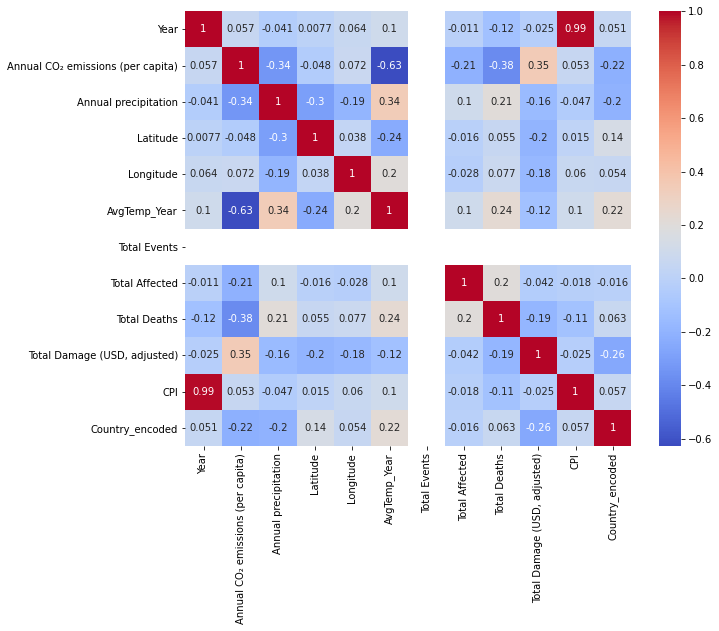

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


c:\Users\Nikitha\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


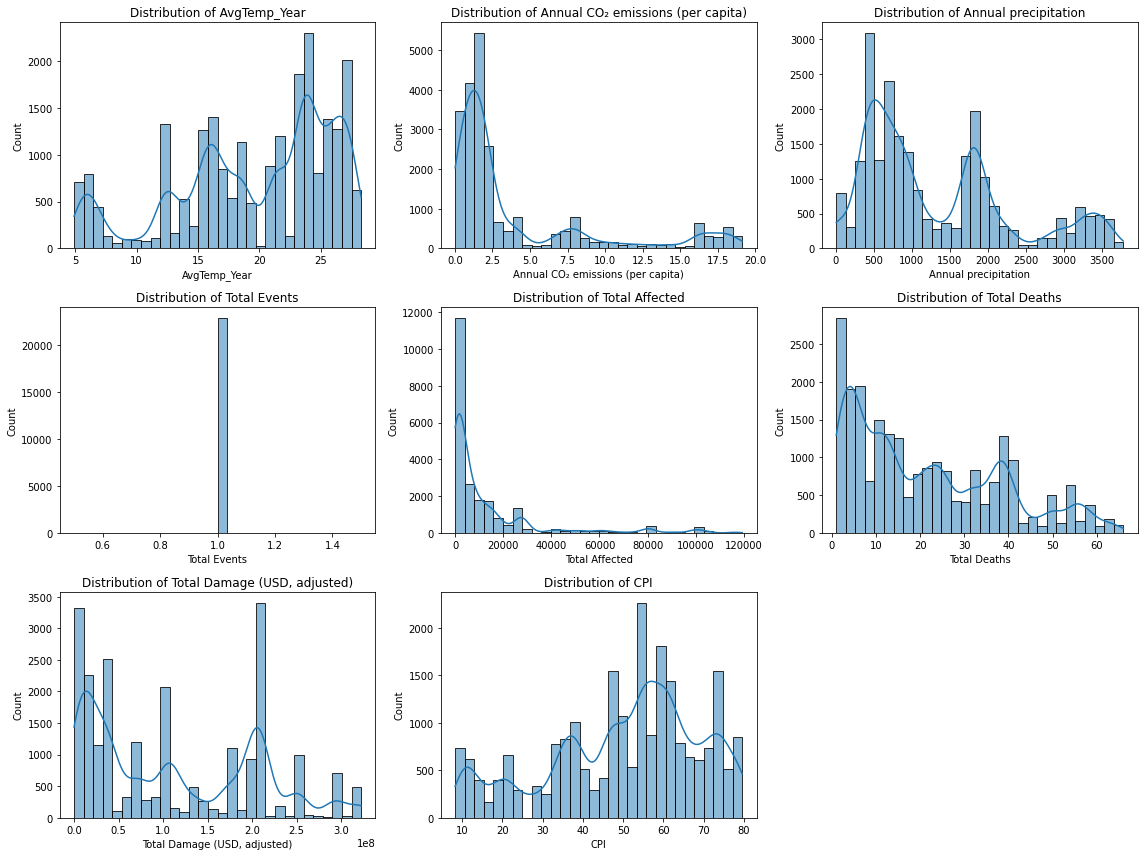

In [174]:
# List of numerical features to visualize
features = ["AvgTemp_Year", "Annual CO₂ emissions (per capita)", "Annual precipitation",
            "Total Events", "Total Affected", "Total Deaths", "Total Damage (USD, adjusted)", "CPI"]

# Plot distributions
plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(merged_df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

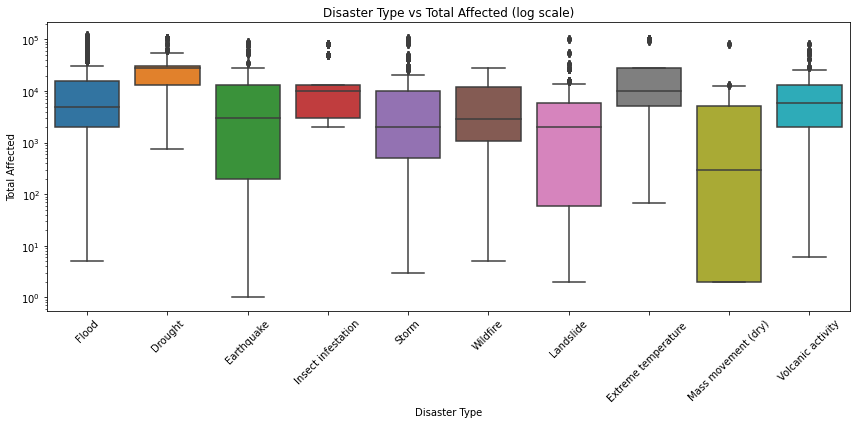

In [175]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="Disaster Type", y="Total Affected")
plt.xticks(rotation=45)
plt.title("Disaster Type vs Total Affected (log scale)")
plt.yscale("log")
plt.tight_layout()
plt.show()

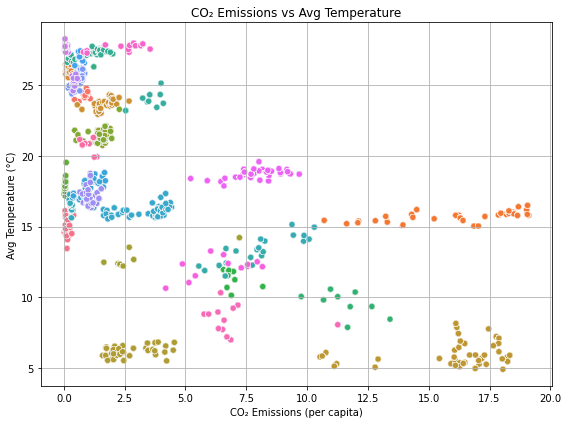

In [176]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x="Annual CO₂ emissions (per capita)", y="AvgTemp_Year", hue="Country", alpha=0.7, legend=False)
plt.title("CO₂ Emissions vs Avg Temperature")
plt.xlabel("CO₂ Emissions (per capita)")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


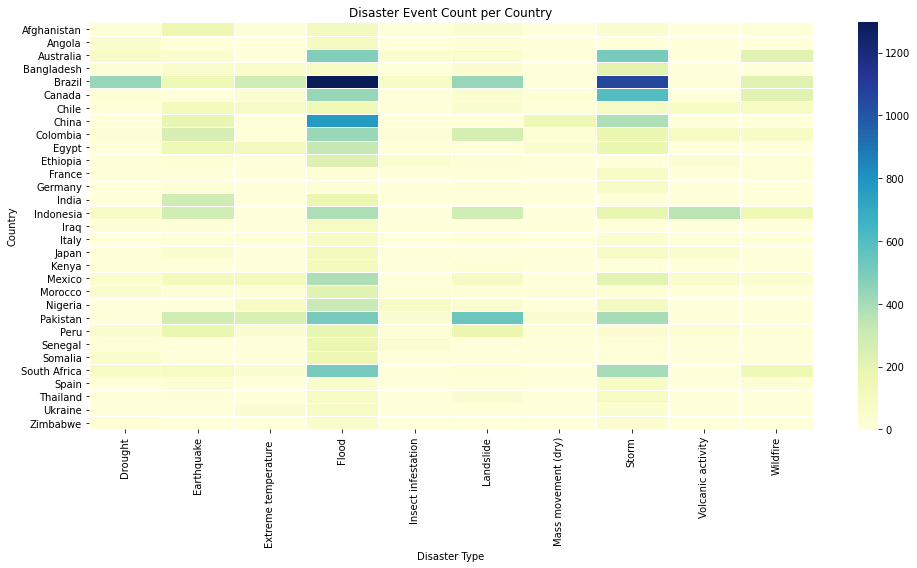

In [177]:
pivot = merged_df.pivot_table(index="Country", columns="Disaster Type", values="Total Events", aggfunc="sum", fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("Disaster Event Count per Country")
plt.tight_layout()
plt.show()


In [178]:
def categorize_impact(x):
    if x < 1000:
        return "Low"
    elif x <= 50000:
        return "Medium"
    else:
        return "High"

merged_df["Impact_Level"] = merged_df["Total Affected"].apply(categorize_impact)

In [179]:
features = ["Country_encoded", "Year", "AvgTemp_Year", "Annual CO₂ emissions (per capita)",
            "Annual precipitation", "CPI", "Disaster Type"]
target = "Impact_Level"

In [180]:
le = LabelEncoder()
merged_df["Country_encoded"] = le.fit_transform(merged_df["Country"])

In [181]:
label_encoders = {}
for col in ["Disaster Type"]:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le

In [182]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(merged_df[features])
y = merged_df[target]

<ipython-input-183-127036ed1a1c>:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


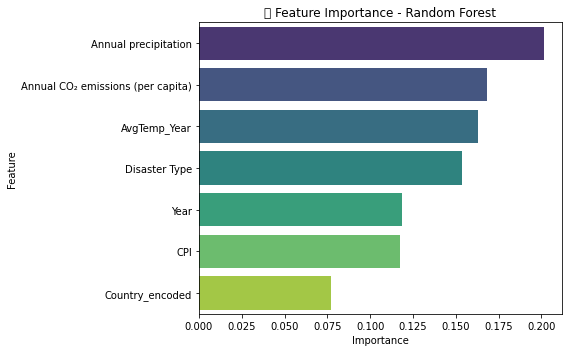

In [183]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 11: Feature Importance
importances = clf.feature_importances_
feature_names = features
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="viridis")
plt.title("🔍 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

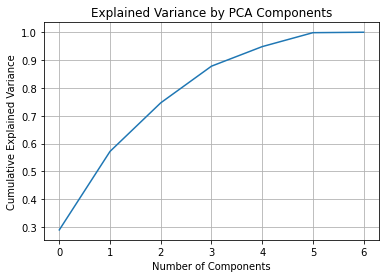

In [185]:
pca = PCA()
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

## Classification

### 1. Random Forest

In [186]:
# Step 7: Train/Test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, stratify=y, random_state=42)

In [187]:
# Step 8: Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 9: Evaluate model
y_pred_log = clf.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred_log))

📊 Classification Report:

              precision    recall  f1-score   support

        High       0.90      0.98      0.94       326
         Low       0.96      0.93      0.94      1145
      Medium       0.97      0.98      0.97      3115

    accuracy                           0.96      4586
   macro avg       0.95      0.96      0.95      4586
weighted avg       0.96      0.96      0.96      4586



In [188]:
import joblib
joblib.dump(clf,"../Scripts/models/classification_rf.pkl")

['../Scripts/models/classification_rf.pkl']

In [53]:
classification_results = []
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: Logistic Regression
classification_results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log, average='macro'),
    "Recall": recall_score(y_test, y_pred_log, average='macro'),
    "F1 Score": f1_score(y_test, y_pred_log, average='macro')
})

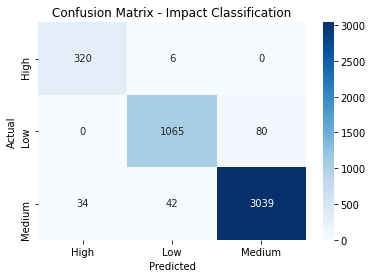

In [54]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log, labels=["High", "Low", "Medium"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Low", "Medium"], yticklabels=["High", "Low", "Medium"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Impact Classification")
plt.show()


### 2. MLP - Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("📊 MLP Classifier:")
print(classification_report(y_test, y_pred_mlp))

📊 MLP Classifier:
              precision    recall  f1-score   support

        High       0.81      0.63      0.71       326
         Low       0.85      0.67      0.75      1145
      Medium       0.86      0.95      0.91      3115

    accuracy                           0.86      4586
   macro avg       0.84      0.75      0.79      4586
weighted avg       0.86      0.86      0.85      4586



C:\Users\Nikitha\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
# MLP
classification_results.append({
    "Model": "MLP",
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Precision": precision_score(y_test, y_pred_mlp, average='macro'),
    "Recall": recall_score(y_test, y_pred_mlp, average='macro'),
    "F1 Score": f1_score(y_test, y_pred_mlp, average='macro')
})

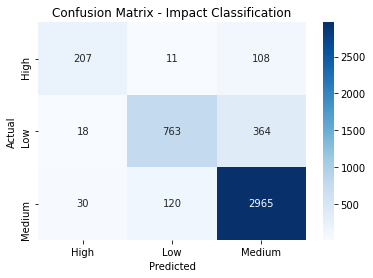

In [57]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp, labels=["High", "Low", "Medium"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Low", "Medium"], yticklabels=["High", "Low", "Medium"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Impact Classification")
plt.show()

### 3. XGBoost

In [58]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

# Encode target labels as integers
le = LabelEncoder()
merged_df["Impact_Level_encoded"] = le.fit_transform(merged_df["Impact_Level"])  # Now classes will be 0, 1, 2

X = merged_df[features]
y = merged_df["Impact_Level_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Decode predictions for human-readable output (optional)
y_pred_labels = le.inverse_transform(y_pred_xgb)
y_test_labels = le.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred_labels))


c:\Users\Nikitha\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

        High       0.98      0.90      0.94       324
         Low       0.97      0.94      0.95      1150
      Medium       0.97      0.99      0.98      3112

    accuracy                           0.97      4586
   macro avg       0.97      0.94      0.96      4586
weighted avg       0.97      0.97      0.97      4586



In [59]:
# XGBoost
classification_results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb, average='macro'),
    "Recall": recall_score(y_test, y_pred_xgb, average='macro'),
    "F1 Score": f1_score(y_test, y_pred_xgb, average='macro')
})


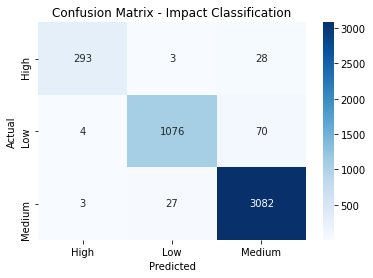

In [60]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=["High", "Low", "Medium"])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Low", "Medium"], yticklabels=["High", "Low", "Medium"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Impact Classification")
plt.show()

In [108]:
cls_results=pd.DataFrame(classification_results)
cls_results.to_csv('../Data/results/classification_results.csv',index=False)

## Regression

In [109]:
le = LabelEncoder()
merged_df["Country_encoded"] = le.fit_transform(merged_df["Country"])

In [110]:
features = ["Country_encoded", "Year"]
targets = ["AvgTemp_Year", "Annual CO₂ emissions (per capita)", "Annual precipitation"]

In [111]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(merged_df[features])
y = merged_df[targets]

### Random Forest Regressor

In [112]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

# def evaluate_model(y_true, y_pred, target_names):
#     for i, target in enumerate(target_names):
#         print(f"\nEvaluation for {target}")
#         print(f"MAE  : {mean_absolute_error(y_true[:, i], y_pred[:, i]):.4f}")
#         print(f"RMSE : {np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i])):.4f}")
#         print(f"R²   : {r2_score(y_true[:, i], y_pred[:, i]):.4f}")

# evaluate_model(y_test.values, y_pred, targets)

In [114]:
def evaluate_model_and_save(y_true, y_pred, target_names, model_name, results_list):
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
        r2 = r2_score(y_true[:, i], y_pred[:, i])
        
        print(f"\n{model_name} - Evaluation for {target}")
        print(f"MAE  : {mae:.4f}")
        print(f"RMSE : {rmse:.4f}")
        print(f"R²   : {r2:.4f}")

        results_list.append({
            "Model": model_name,
            "Target": target,
            "MAE": mae,
            "RMSE": rmse,
            "R2 Score": r2
        })


In [115]:
results=[]
y_pred_rf = model.predict(X_test)
evaluate_model_and_save(y_test.values, y_pred_rf, targets, "Random Forest", results)


Random Forest - Evaluation for AvgTemp_Year
MAE  : 0.0000
RMSE : 0.0002
R²   : 1.0000

Random Forest - Evaluation for Annual CO₂ emissions (per capita)
MAE  : 0.0000
RMSE : 0.0001
R²   : 1.0000

Random Forest - Evaluation for Annual precipitation
MAE  : 0.0067
RMSE : 0.1055
R²   : 1.0000


In [116]:
merged_df.head()

,Country,Year,Annual CO₂ emissions (per capita),Annual precipitation,Latitude,Longitude,AvgTemp_Year,Disaster Type,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)",CPI,Country_encoded,Impact_Level,Impact_Level_encoded
0,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,3,1.0,7500.0,51.0,8342696.0,9.288532,0,Medium,2
1,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,3,1.0,7500.0,51.0,8342696.0,9.288532,0,Medium,2
2,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,3,1.0,7500.0,51.0,8342696.0,9.288532,0,Medium,2
3,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,3,1.0,7500.0,51.0,8342696.0,9.288532,0,Medium,2
4,Afghanistan,1956.0,0.021669,397.5075,34.56,70.05,14.579417,3,1.0,7500.0,51.0,8342696.0,9.288532,0,Medium,2


In [117]:
def forecast(country_name, year):
    encoded_country = le.transform([country_name])[0]
    input_data = pd.DataFrame([[encoded_country, year]], columns=["Country_encoded", "Year"])
    prediction = model.predict(input_data)[0]
    return {
        "AvgTemp_Year": prediction[0],
        "Annual CO₂ emissions (per capita)": prediction[1],
        "Annual precipitation": prediction[2]
    }

# Example usage
print("\n🔮 Forecast for Afghanistan in 2025:")
print(forecast("Afghanistan", 2025))


🔮 Forecast for Afghanistan in 2025:
{'AvgTemp_Year': 10.0625, 'Annual CO₂ emissions (per capita)': 9.76027699999998, 'Annual precipitation': 932.0201799999984}


C:\Users\Nikitha\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nikitha\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nikitha\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [118]:
df = merged_df[["Country_encoded", "Year", "AvgTemp_Year", 
         "Annual CO₂ emissions (per capita)", "Annual precipitation"]]
df = df.sort_values(["Country_encoded", "Year"]).reset_index(drop=True)

In [119]:
import joblib 
joblib.dump(model,"../Scripts/models/random_forest.pkl")

['../Scripts/models/random_forest.pkl']

### 2. LSTM

In [120]:
# Normalize the features
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# STEP 2: Create LSTM sequences
SEQUENCE_LENGTH = 10
X_seq, y_seq = [], []

for i in range(len(scaled_df) - SEQUENCE_LENGTH):
    if scaled_df.iloc[i:i+SEQUENCE_LENGTH]["Country_encoded"].nunique() == 1:
        X_seq.append(scaled_df.iloc[i:i+SEQUENCE_LENGTH][["Country_encoded", "Year"]].values)
        y_seq.append(scaled_df.iloc[i+SEQUENCE_LENGTH][[
            "AvgTemp_Year", 
            "Annual CO₂ emissions (per capita)", 
            "Annual precipitation"
        ]].values)

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# STEP 3: Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3)  # Output layer for 3 targets
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
284/284 [==============================] - 3s 7ms/step - loss: 0.0852 - mae: 0.2292 - val_loss: 0.0609 - val_mae: 0.2021
Epoch 2/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0616 - mae: 0.2021 - val_loss: 0.0549 - val_mae: 0.1859
Epoch 3/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0468 - mae: 0.1652 - val_loss: 0.0331 - val_mae: 0.1351
Epoch 4/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0307 - mae: 0.1294 - val_loss: 0.0231 - val_mae: 0.1053
Epoch 5/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0250 - mae: 0.1103 - val_loss: 0.0210 - val_mae: 0.0967
Epoch 6/50
284/284 [==============================] - 2s 5ms/step - loss: 0.0228 - mae: 0.1021 - val_loss: 0.0187 - val_mae: 0.0840
Epoch 7/50
284/284 [==============================] - 2s 6ms/step - loss: 0.0213 - mae: 0.0969 - val_loss: 0.0184 - val_mae: 0.0856
Epoch 8/50
284/284 [==============================] - 2s 5ms/step - loss: 0.

In [125]:
loss, mae = lstm_model.evaluate(X_test, y_test)
print("Test MSE Loss:", loss)
print("Test MAE:", mae)

142/142 [==============================] - 0s 2ms/step - loss: 0.0027 - mae: 0.0363
Test MSE Loss: 0.0027331302408128977
Test MAE: 0.03630981966853142


In [127]:
last_seq = X_seq[-1].reshape(1, 10, 2)
prediction = lstm_model.predict(last_seq)[0]
inv_scaled = scaler.inverse_transform([[0, 0] + list(prediction)])
print("Predicted values (Temperature, CO₂, Rainfall):", inv_scaled[0][2:])

1/1 [==============================] - 0s 162ms/step
Predicted values (Temperature, CO₂, Rainfall): [  22.77767749    2.50776071 1329.26537549]


In [128]:
y_pred = lstm_model.predict(X_test)
labels = ["AvgTemp_Year", "Annual CO₂ emissions (per capita)", "Annual precipitation"]
# Evaluate with RMSE and R²
for i in range(3):
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    results.append({
        "Model":"LSTM",
        "Target": labels[i],
        "MAE":mae,
        "RMSE": rmse,
        "R2 Score": r2
        
    })
    print(f"\n🔍 {labels[i]} Evaluation:")
    print(f"  MAE : {mae:.4f}")
    print(f"  RMSE     : {rmse:.4f}")
    print(f"  R² Score : {r2:.4f}")

142/142 [==============================] - 0s 2ms/step

🔍 AvgTemp_Year Evaluation:
  MAE : 0.0421
  RMSE     : 0.0538
  R² Score : 0.9612

🔍 Annual CO₂ emissions (per capita) Evaluation:
  MAE : 0.0263
  RMSE     : 0.0416
  R² Score : 0.9749

🔍 Annual precipitation Evaluation:
  MAE : 0.0405
  RMSE     : 0.0598
  R² Score : 0.9444


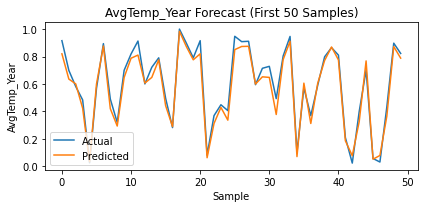

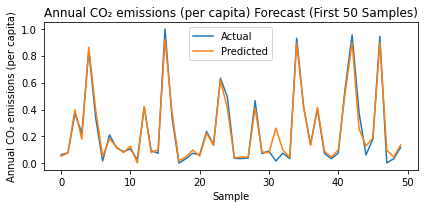

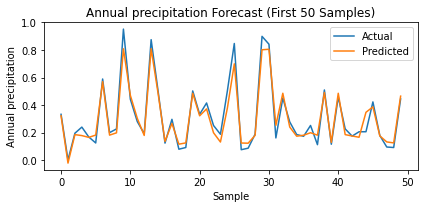

In [129]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(6, 3))
    plt.plot(y_test[:50, i], label="Actual")
    plt.plot(y_pred[:50, i], label="Predicted")
    plt.title(f"{labels[i]} Forecast (First 50 Samples)")
    plt.xlabel("Sample")
    plt.ylabel(labels[i])
    plt.legend()
    plt.tight_layout()
    plt.show()

In [130]:
def forecast_lstm(country_name, next_year, raw_df, scaler, model, le):
    # Step 1: Get last 5 years of data for the country
    country_id = le.transform([country_name])[0]
    country_data = raw_df[raw_df["Country"] == country_name].sort_values("Year")

    # Check if we have at least 5 years of data
    if len(country_data) < 5:
        raise ValueError(f"Not enough data for {country_name} to make LSTM prediction.")

    last_5 = country_data[["Country_encoded", "Year"]].tail(5).copy()

    # Step 2: Normalize this input using same scaler
    input_for_scaling = country_data[["Country_encoded", "Year", "AvgTemp_Year",
                                      "Annual CO₂ emissions (per capita)", "Annual precipitation"]].tail(5)
    scaled = scaler.transform(input_for_scaling)
    scaled_last_5 = scaled[:, :2]  # Only Country_encoded and Year as LSTM input features

    # Step 3: Reshape for LSTM input
    input_seq = scaled_last_5.reshape(1, 5, 2)

    # Step 4: Predict using the LSTM model
    pred_scaled = model.predict(input_seq)[0]

    # Step 5: Inverse transform the output
    inverse_input = np.zeros((1, 5))  # 5 columns like in scaled_df
    inverse_input[0, 2:] = pred_scaled  # Put predicted values in correct position
    prediction = scaler.inverse_transform(inverse_input)[0][2:]  # Extract the target columns only

    return {
        "AvgTemp_Year": prediction[0],
        "Annual CO₂ emissions (per capita)": prediction[1],
        "Annual precipitation": prediction[2]
    }



In [134]:
df_original = pd.read_csv("../Data/merged_df.csv")

# Reapply Country encoding so it matches the model
df_original["Country_encoded"] = le.transform(df_original["Country"])

# Then use:
forecast_lstm("India", 2045, raw_df=df_original, scaler=scaler, model=lstm_model, le=le)


1/1 [==============================] - 0s 17ms/step


{'AvgTemp_Year': 13.296740438779194,
 'Annual CO₂ emissions (per capita)': 6.356959589332331,
 'Annual precipitation': 448.71371230380504}

In [135]:
import joblib 
joblib.dump(lstm_model,"../Scripts/models/lstm.pkl")

INFO:tensorflow:Assets written to: ram://d7ad7b98-1fb2-42de-a48d-7e496df9e50d/assets


['../Scripts/models/lstm.pkl']

### 3. XGBoost

In [91]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [103]:
df = pd.read_csv("../Data/merged_df.csv")

In [104]:
import joblib
le = LabelEncoder()
df["Country_encoded"] = le.fit_transform(df["Country"])

joblib.dump(le, "../Scripts/models/country_label_encoder.pkl")
# 🔹 Define features and targets
X = df[["Country_encoded", "Year"]]
y = df[["AvgTemp_Year", "Annual CO₂ emissions (per capita)", "Annual precipitation"]]

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# 🔹 Scale inputs (optional, but improves convergence)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [106]:
model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
model.fit(X_train_scaled, y_train)

# 🔹 Predict
y_pred = model.predict(X_test_scaled)
y_true=y_test.values

In [107]:
for i, label in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    print(f"\n🔍 Evaluation for {label}:")
    print(f"  MAE     : {mae:.4f}")
    print(f"  RMSE     : {rmse:.4f}")
    print(f"  R² Score : {r2:.4f}")
    results.append({
    "Model": "XGBoost",
    "Target": label,
    "MAE": mae,
    "RMSE": rmse,
    "R2 Score": r2
})


🔍 Evaluation for AvgTemp_Year:
  MAE     : 0.0318
  RMSE     : 0.0518
  R² Score : 0.9999

🔍 Evaluation for Annual CO₂ emissions (per capita):
  MAE     : 0.0091
  RMSE     : 0.0155
  R² Score : 1.0000

🔍 Evaluation for Annual precipitation:
  MAE     : 8.3728
  RMSE     : 12.5208
  R² Score : 0.9998


In [98]:
import joblib
joblib.dump(model,'../Scripts/models/XGBoost.pkl')

['../Scripts/models/XGBoost.pkl']

In [99]:
def predict_xgboost(country_name, year, model, label_encoder, scaler):
    # Encode country
    if country_name not in label_encoder.classes_:
        raise ValueError(f"Country '{country_name}' not found in training data.")
    
    encoded_country = label_encoder.transform([country_name])[0]
    
    # Use DataFrame to keep feature names
    input_features = pd.DataFrame([[encoded_country, year]], columns=["Country_encoded", "Year"])
    
    # Scale
    input_scaled = scaler.transform(input_features)
    
    # Predict
    prediction = model.predict(input_scaled)[0]
    
    return {
        "AvgTemp_Year": prediction[0],
        "Annual CO₂ emissions (per capita)": prediction[1],
        "Annual precipitation": prediction[2]
    }

# 🔮 Example usage
forecast = predict_xgboost("India", 2025, model, le, scaler_X)
print("\n🔮 Forecast for India in 2025:")
for key, value in forecast.items():
    print(f"{key}: {value:.4f}")



🔮 Forecast for India in 2025:
AvgTemp_Year: 27.1826
Annual CO₂ emissions (per capita): 1.5390
Annual precipitation: 1351.8510


<ipython-input-88-f35e41ef90b1>:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\Nikitha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


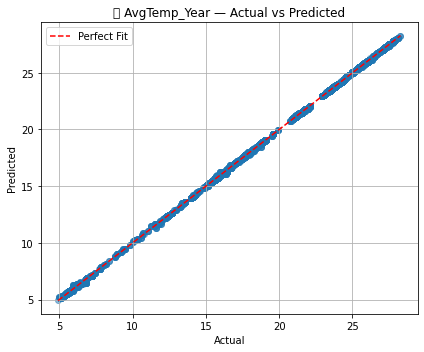

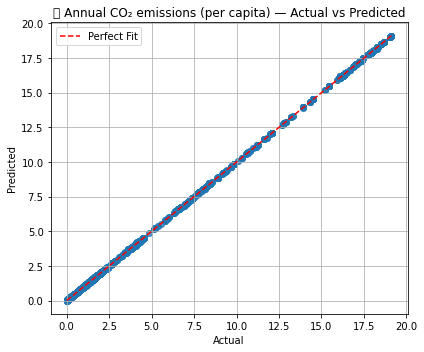

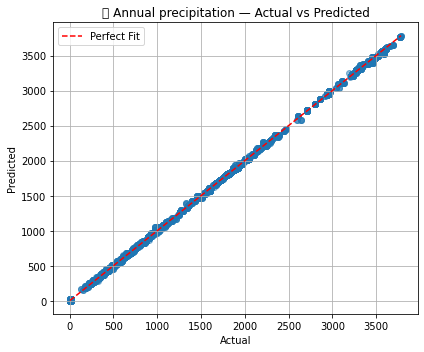

In [88]:
import matplotlib.pyplot as plt

y_pred_df = pd.DataFrame(y_pred, columns=y.columns)

for i, label in enumerate(y.columns):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test.iloc[:, i], y_pred_df.iloc[:, i], alpha=0.5)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             'r--', label="Perfect Fit")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"📊 {label} — Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [89]:
reg_results=pd.DataFrame(results)

In [90]:
reg_results.to_csv('../Data/results/Regression_results.csv')


📊 Classification Report:
                      precision    recall  f1-score   support

             Drought       0.66      0.65      0.65       211
          Earthquake       0.73      0.66      0.69       510
Extreme temperature        0.71      0.50      0.59       243
               Flood       0.75      0.75      0.75      1625
  Insect infestation       0.74      0.64      0.69        77
           Landslide       0.58      0.59      0.58       439
 Mass movement (dry)       1.00      0.75      0.86        60
               Storm       0.68      0.75      0.72      1032
   Volcanic activity       0.42      0.44      0.43       142
            Wildfire       0.48      0.55      0.51       247

            accuracy                           0.68      4586
           macro avg       0.68      0.63      0.65      4586
        weighted avg       0.69      0.68      0.68      4586



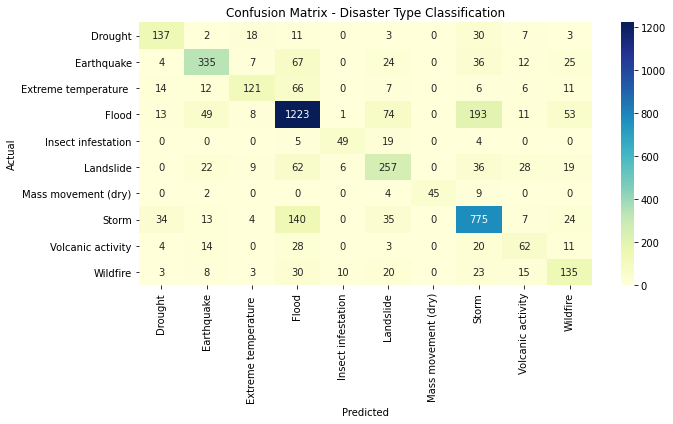

✅ Model and encoders saved to 'Models/' directory.


In [191]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data
df = pd.read_csv("../Data/merged_df.csv")

# Step 2: Select relevant features and drop missing
features = ["Country", "Latitude", "Longitude", "AvgTemp_Year",
            "Annual CO₂ emissions (per capita)", "Annual precipitation", "CPI"]
target = "Disaster Type"
df = df[features + [target]].dropna()

# Step 3: Convert Latitude and Longitude to numeric
def convert_lat_lon(val):
    if isinstance(val, str):
        if val[-1] in ['N', 'E']:
            return float(val[:-1])
        elif val[-1] in ['S', 'W']:
            return -float(val[:-1])
    return np.nan

df["Latitude"] = df["Latitude"].apply(convert_lat_lon)
df["Longitude"] = df["Longitude"].apply(convert_lat_lon)
df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Step 4: Encode Categorical Columns
le_country = LabelEncoder()
df["Country_encoded"] = le_country.fit_transform(df["Country"])

le_target = LabelEncoder()
df["Disaster_Type_Label"] = le_target.fit_transform(df["Disaster Type"])

# Step 5: Prepare X and y
X = df[["Country_encoded", "Latitude", "Longitude", "AvgTemp_Year",
        "Annual CO₂ emissions (per capita)", "Annual precipitation", "CPI"]]
y = df["Disaster_Type_Label"]

# Step 6: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Train the Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 9: Predictions and Evaluation
y_pred = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title("Confusion Matrix - Disaster Type Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 11: Save Model and Encoders
os.makedirs("Models", exist_ok=True)
joblib.dump(clf, "Models/disaster_rf_model.pkl")
joblib.dump(le_country, "Models/country_encoder.pkl")
joblib.dump(le_target, "Models/disaster_label_encoder.pkl")
joblib.dump(scaler, "Models/feature_scaler.pkl")

print("✅ Model and encoders saved to 'Models/' directory.")


In [ ]:
import joblib
import numpy as np

unique_countries = df["Country"].dropna().unique()

# Fit LabelEncoder
le_country = LabelEncoder()
le_country.fit(unique_countries)

# Save the encoder
joblib.dump(le_country, "../Scripts/models/country_encoder.pkl")
print("Updated and saved country_encoder.pkl with full country list.")

# Load models and encoders
model = joblib.load("../Scripts/models/disaster_rf_model.pkl")
le_target = joblib.load("../Scripts/models/disaster_label_encoder.pkl")
scaler = joblib.load("../Scripts/models/feature_scaler.pkl")

# Country → Latitude/Longitude mapping
country_coords = {
    "India": (20.5937, 78.9629),
    "United States": (37.0902, -95.7129),
    "Brazil": (-14.2350, -51.9253),
    "Japan": (36.2048, 138.2529),
    "Australia": (-25.2744, 133.7751),
    "Germany": (51.1657, 10.4515),
    "France": (46.6034, 1.8883),
    "China": (35.8617, 104.1954),
    "Canada": (56.1304, -106.3468),
    "South Africa": (-30.5595, 22.9375)
}

# Step 1: Get user input
country = input("Enter Country Name (e.g., India): ").strip()
year = int(input("Enter Year: "))

# Dummy/average climate inputs (replace with your predictors or model outputs)
avg_temp = 24.0
co2 = 1.8
precip = 900
cpi = 3.5

# Step 2: Get Lat/Lon from dictionary
if country not in country_coords:
    raise ValueError(f"❌ Country '{country}' not available in current list.")
lat, lon = country_coords[country]

# Step 3: Prepare input vector
country_encoded = le_country.transform([country])[0]
features = np.array([[country_encoded, lat, lon, avg_temp, co2, precip, cpi]])
features_scaled = scaler.transform(features)

# Step 4: Predict
pred_label = model.predict(features_scaled)[0]
predicted_disaster = le_target.inverse_transform([pred_label])[0]

print(f"\n🌍 Country: {country}")
print(f"📅 Year: {year}")
print(f"🚨 Predicted Disaster Type: {predicted_disaster}")


Updated and saved country_encoder.pkl with full country list.

🌍 Country: India
📅 Year: 2003
🚨 Predicted Disaster Type: Earthquake


C:\Users\Nikitha\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
